In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cyberbullying_tweets.csv',encoding='ISO-8859-1')

In [3]:
data.head(2)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying


In [4]:
#checking if there are any null values
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [5]:
data.shape

(47692, 2)

In [6]:
#converting the nominal classes into ordinal classes or numerical classes....by using label encoder
from sklearn.preprocessing import LabelEncoder as LE
le = LE()
data['cyberbullying_type'] = le.fit_transform(data['cyberbullying_type'])


In [7]:
#checking the no.of unique values in the class variable
data['cyberbullying_type'].unique()

array([3, 2, 5, 4, 0, 1])

In [8]:
#importing data into variables...
X = data['tweet_text'].values
y = data['cyberbullying_type'].values
print(X[:2])
print(y[:2])

['In other words #katandandre, your food was crapilicious! #mkr'
 'Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc']
[3 3]


In [9]:
#cleaning the data
import nltk
import re 
#nltk.download('all')



In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]

In [11]:
n = len(X)
for i in range(n):
    #print(X[i])
    news = re.sub('[^a-zA-z]',' ',X[i])
    #print(news)
    news = news.lower()
    news = news.split()
    #print(news)
    news = [ps.stem(word) for word in news if word not in stopwords.words('english')]
    news = ' '.join(news)
    #print(news)
    corpus.append(news)
print(len(corpus))    

47692


In [12]:
print(X[0],'\n',corpus[0],y[0])

In other words #katandandre, your food was crapilicious! #mkr 
 word katandandr food crapilici mkr 3


In [37]:
'''from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()'''
!pip install imblearn

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from imblearn.pipeline import Pipeline, make_pipeline

In [14]:
X_train,X_test,y_train,y_test = train_test_split(corpus,y,test_size = 0.25,random_state=99)
print(X_train[0],y_train[0])
print(X_test[0],y_test[0])

rt fruitondabottom idontneedfemin hate manipul feminist entertain womenagainstfemin letstalkmen h 2
archibaldcran lostsailorni fuck insult mlk wow 2


In [15]:
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
results=[]
tfidf = TfidfVectorizer() 
model = RFC() 
x_train = tfidf.fit_transform(X_train) 
x_test = tfidf.transform(X_test) 


In [23]:
#random forest classifier

In [16]:
from imblearn.over_sampling import SMOTE
pipe_line = Pipeline([ 
 ('tfidf', tfidf), 
 ('smote', SMOTE(random_state=12)), 
 ('model', model) 
]) 
pipe_line.fit(X_train, y_train) 
pred = pipe_line.predict(X_test) 
print(accuracy_score(y_test, pred)) 
acc=accuracy_score(y_test, pred) 
results.append(acc) 

0.8269730772456596


In [21]:
!pip install xgboost

In [19]:
#xgboost

In [20]:
import pickle 
import xgboost 
from xgboost import XGBClassifier 
xgb_model = XGBClassifier() 
xgb_pipe_line = Pipeline([ 
 ('tfidf', tfidf), 
 ('smote', SMOTE(random_state=12)), 
 ('model', xgb_model) 
]) 
xgb_pipe_line.fit(X_train, y_train) 
pred = xgb_pipe_line.predict(X_test) 
acc=accuracy_score(y_test, pred) 
results.append(acc) 
print(accuracy_score(y_test, pred)) 
pickle.dump(xgb_pipe_line, open("xgb.pkl", 'wb')) 

0.846682881825044


In [22]:
#logistic regression
logisticX=corpus[:]
logisticy=[]
for i in range(len(corpus)):
    if y[i]==3:
        logisticy.append(0)
    else:
        logisticy.append(1)
        
print(logisticX[:2])
print(logisticy[:2])
logisticXtrain,logisticXtest,logisticytrain,logisticytest = train_test_split(logisticX,logisticy,test_size=0.25,random_state=99)
    

['word katandandr food crapilici mkr', 'aussietv white mkr theblock imacelebrityau today sunris studio neighbour wonderlandten etc']
[0, 0]


In [23]:
print(logisticXtrain[:2],logisticytrain[:2])
print(logisticXtest[:2],logisticytest[:2])

['rt fruitondabottom idontneedfemin hate manipul feminist entertain womenagainstfemin letstalkmen h', 'bulli school self explanatori'] [1, 1]
['archibaldcran lostsailorni fuck insult mlk wow', 'went high school major black white hispan surpris news racist white cop slam hispan girl ground gay guy school got bulli white kid lacross team'] [1, 1]


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
bow_converter = CountVectorizer()
#print(bow_converter)
logisticxmodel = bow_converter.fit_transform(logisticXtrain)
bagofwords = bow_converter.get_feature_names()
#print(bagofwords)
print(len(bagofwords))
print(logisticxmodel.toarray())

39968
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
from sklearn.linear_model import LogisticRegression


logisticmodel = LogisticRegression().fit(logisticxmodel.toarray(),logisticytrain)
logisticscore = logisticmodel.score(logisticXtest,logisticytest)
print(logisticscore)

MemoryError: Unable to allocate 10.7 GiB for an array with shape (35769, 39968) and data type float64

In [39]:
#creating a new countVectorizer object for the use of logisticpipeline
bow_pipeline = CountVectorizer()

In [41]:
#since space is not enough to directly create a model....we make use of pipelines.
logisticmodel = LogisticRegression()
logistic_pipe_line = Pipeline([
    ('bow',bow_pipeline),
    ('smote',SMOTE(random_state=33)),
    ('model',logisticmodel)
])
logistic_pipe_line.fit(logisticXtrain,logisticytrain)
logisticpred = logistic_pipe_line.predict(logisticXtest)
logisticacc = accuracy_score(logisticytest,logisticpred)
print(logisticacc)

0.8368699152897761


In [43]:
logistic_pipe_line_2 = Pipeline([
    ('tfidf',tfidf),
    ('smote',SMOTE(random_state=33)),
    ('model',logisticmodel)
])
logistic_pipe_line_2.fit(logisticXtrain,logisticytrain)
logisticpred2 = logistic_pipe_line_2.predict(logisticXtest)
logisticacc2 = accuracy_score(logisticytest,logisticpred2)
print(logisticacc2)

0.8382118594313511


In [45]:
#naive bayes multinomial model
nb_xtrain,nb_xtest,nb_ytrain,nb_ytest = train_test_split(corpus,y,test_size=0.25,random_state=99)
print(len(nb_xtrain),len(nb_xtest))

35769 11923


In [46]:
nb_xtrain = tfidf.fit_transform(nb_xtrain)
nb_xtest = tfidf.transform(nb_xtest)


#creating naive bayes classifier
nb_clf= MNB(alpha=0.5)
nb_clf.fit(nb_xtrain,nb_ytrain)
nbpred = nb_clf.predict(nb_xtest)


In [47]:
print(accuracy_score(nbpred,nb_ytest))

0.7632307305208421


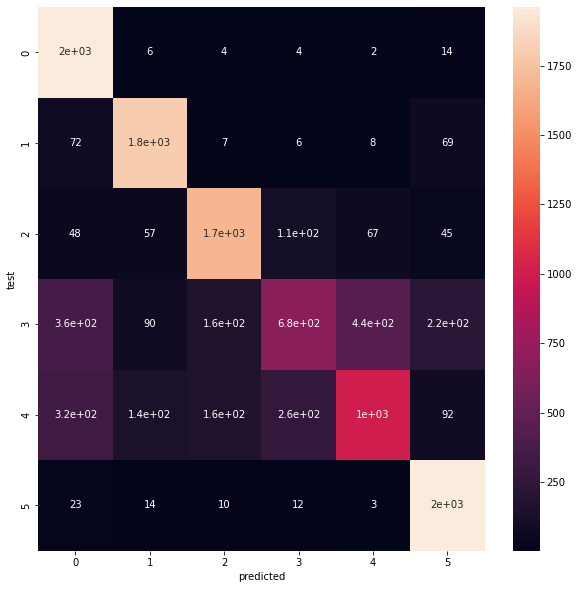

In [62]:
fig, hm = plt.subplots(figsize=(10,10))
hm = sns.heatmap(confusion_matrix(nb_ytest,nbpred),annot=True)
hm.set_xlabel('predicted')
hm.set_ylabel('test')
#hm.xaxis.set_ticklabels(labels,fontsize=16)
#hm.yaxis.set_ticklabels(labels, fontsize=14.5)
plt.show()

In [66]:
from sklearn.metrics import classification_report
print("Classification report\n",classification_report(nb_ytest,nbpred))

Classification report
               precision    recall  f1-score   support

           0       0.70      0.98      0.82      1991
           1       0.85      0.92      0.88      1962
           2       0.83      0.84      0.84      2011
           3       0.63      0.35      0.45      1945
           4       0.66      0.51      0.57      1993
           5       0.82      0.97      0.89      2021

    accuracy                           0.76     11923
   macro avg       0.75      0.76      0.74     11923
weighted avg       0.75      0.76      0.74     11923



In [1]:
#svm

In [18]:
from sklearn import svm
svmclassifier = svm.SVC(decision_function_shape='ovr')
svmX = corpus
svmy = y
svmXtrain,svmXtest,svmytrain,svmytest = train_test_split(svmX,svmy,test_size=0.25,random_state = 99)


In [26]:
#converting text to vectors
svmXtrain_tfidf = tfidf.fit_transform(svmXtrain)
svmXtest_tfidf = tfidf.transform(svmXtest)
svmclassifier.fit(svmXtrain_tfidf,svmytrain)

SVC()

In [27]:
svmpred = svmclassifier.predict(svmXtest_tfidf)
print(accuracy_score(svmytest,svmpred))

0.8312505241969304


In [30]:
svmclassifier2 = svm.LinearSVC(multi_class='ovr')
svmclassifier2.fit(svmXtrain_tfidf,svmytrain)
svmpred2 = svmclassifier2.predict(svmXtest_tfidf)
print(accuracy_score(svmpred2,svmytest))

0.8242891889625095


In [32]:
svmclassifier3 = svm.NuSVC(kernel='linear',decision_function_shape='ovr')
svmclassifier3.fit(svmXtrain_tfidf,svmytrain)
svmpred3 = svmclassifier3.predict(svmXtest_tfidf)
print(accuracy_score(svmpred3,svmytest))

0.7959406189717353


In [34]:
svmclassifier4 = svm.NuSVC(kernel='rbf',decision_function_shape='ovr')
svmclassifier4.fit(svmXtrain_tfidf,svmytrain)
svmpred4 = svmclassifier4.predict(svmXtest_tfidf)
print(accuracy_score(svmpred4,svmytest))

0.7936760882328273


In [35]:
svmclassifier5 = svm.NuSVC(kernel='poly',decision_function_shape='ovr')
svmclassifier5.fit(svmXtrain_tfidf,svmytrain)
svmpred5 = svmclassifier5.predict(svmXtest_tfidf)
print(accuracy_score(svmpred5,svmytest))

0.7409209091671559


In [17]:
#checking all models for binary classification instead of multi class classification

In [23]:
binaryX = corpus[:]
binaryy=[]
n = len(corpus)
for i in range(n):
    if y[i]==3:
        binaryy.append(0)
    else:
        binaryy.append(1)
binaryXtrain,binaryXtest,binaryytrain,binaryytest = train_test_split(binaryX,binaryy,test_size=0.25,random_state=99)
print(binaryXtrain[:2],binaryytrain[:2])
print(binaryXtest[:2],binaryytest[:2])

['rt fruitondabottom idontneedfemin hate manipul feminist entertain womenagainstfemin letstalkmen h', 'bulli school self explanatori'] [1, 1]
['archibaldcran lostsailorni fuck insult mlk wow', 'went high school major black white hispan surpris news racist white cop slam hispan girl ground gay guy school got bulli white kid lacross team'] [1, 1]


In [24]:
#randomforestclassifier
binary_rfcmodel = RFC()
binary_rfcpipeline = Pipeline([
    ('tfidf',tfidf),
    ('smote',SMOTE(random_state=33)),
    ('model',binary_rfcmodel)
])

In [25]:
#fitting the model and predicting the accuracy
binary_rfcpipeline.fit(binaryXtrain,binaryytrain)
rfc_binary_pred = binary_rfcpipeline.predict(binaryXtest)
print('Accuracy score is',accuracy_score(rfc_binary_pred,binaryytest))

Accuracy score is 0.8399731611171685


In [26]:
#fitting xgboost
import xgboost 
from xgboost import XGBClassifier 
binary_xgb_model = XGBClassifier() 
binary_xgb_pipe_line = Pipeline([ 
 ('tfidf', tfidf), 
 ('smote', SMOTE(random_state=33)), 
 ('model', binary_xgb_model) 
]) 
binary_xgb_pipe_line.fit(binaryXtrain,binaryytrain) 
binary_xgbpred = binary_xgb_pipe_line.predict(binaryXtest) 
binary_xgb_acc=accuracy_score(binary_xgbpred,binaryytest)
print("Accuracy score is",binary_xgb_acc)

Accuracy score is 0.8289021219491739


In [28]:
#tranforming the data for multinomial naive bayes
binaryXtrain_tfidf = tfidf.fit_transform(binaryXtrain)
binaryXtest_tfidf = tfidf.transform(binaryXtest)

In [32]:
#multinomial naive bayes

binary_nb_clf= MNB(alpha=0.5)
binary_nb_clf.fit(binaryXtrain_tfidf,binaryytrain)
binary_nbpred = binary_nb_clf.predict(binaryXtest_tfidf)

print(accuracy_score(binary_nbpred,binaryytest))


0.8555732617629791


In [35]:
#SVM
from sklearn import svm

In [36]:
binarysvm1 = svm.SVC(decision_function_shape='ovr')
binarysvm1.fit(binaryXtrain_tfidf,binaryytrain)
binary_svm_pred1 = binarysvm1.predict(binaryXtest_tfidf)
print('accuracy score is',accuracy_score(binary_svm_pred1,binaryytest))

accuracy score is 0.8609410383292796


In [37]:
binarysvm2 = svm.LinearSVC(multi_class='ovr')
binarysvm2.fit(binaryXtrain_tfidf,binaryytrain)
binary_svmpred2 = binarysvm2.predict(binaryXtest_tfidf)
print(accuracy_score(binary_svmpred2,binaryytest))

0.8561603623249182


In [45]:
binarysvm3 = svm.NuSVC(nu=0.1,kernel='linear',decision_function_shape='ovr')
binarysvm3.fit(binaryXtrain_tfidf,binaryytrain)
binary_svmpred3 = binarysvm3.predict(binaryXtest_tfidf)
print(accuracy_score(binary_svmpred3,binaryytest))

0.8306634236349912


In [47]:
binarysvm4 = svm.NuSVC(nu=0.2,kernel='rbf',decision_function_shape='ovr')
binarysvm4.fit(binaryXtrain_tfidf,binaryytrain)
binary_svmpred4 = binarysvm4.predict(binaryXtest_tfidf)
print(accuracy_score(binary_svmpred4,binaryytest))

0.8558248762895244


In [49]:
binarysvm5 = svm.NuSVC(nu=0.3,kernel='poly',decision_function_shape='ovr')
binarysvm5.fit(binaryXtrain_tfidf,binaryytrain)
binary_svmpred5 = binarysvm5.predict(binaryXtest_tfidf)
print(accuracy_score(binary_svmpred5,binaryytest))

0.8263859766837205


# DL 

In [4]:
#cnn
#paper referred https://pdfs.semanticscholar.org/d581/7c496cf950fd82ef6e05dfa4eaa6f27c24ec.pdf


In [5]:
!pip install keras

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\asadi\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\asadi\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\asadi\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\asadi\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\asadi\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\asadi\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\asadi\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\asadi\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

In [7]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
mysql-connector-python 8.0.31 requires protobuf<=3.20.1,>=3.11.0, but you have protobuf 4.22.3 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.17.3 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.17.3 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.17.3 which is incompatible.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439795 sha256=0e9a3227a4d3f97b90d978f8fd45a256769834a3f7dafc4fe6afdc87ef5ed0f0
  Stored in directory: c:\users\asadi\appdata\local\pip\cache\wheels\05\94\dc\81042da9bced43ff430bc02043d213d9e4b210b584c39e31c1
Successfully built jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation

In [9]:
# Importing libraries
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.Embeddings import Embedding
from keras.preprocessing import sequence

cnnX = corpus
cnnY = y

cnnXtrain,cnnXtest,cnnYtrain,cnnYtest = train_test_split(cnnX,cnnY,test_size = 0.25,random_state=99)


print('Shape of training data: ')
print(cnnXtrain.shape)
print(cnnYtrain.shape)
print('Shape of test data: ')
print(cnnXtest.shape)
print(cnnYtest.shape)

ModuleNotFoundError: No module named 'keras.layers.Embeddings'